# Depth estimation
Depth estimation refers to estimate the distance of objects to a reference point. It can be measured in active methods or passive ones. In this blog, we will take about passive methods in monocular depth estimation.

## Monocular depth estimation
Monocular depth refers to estimates depth from a single image. Is this possible?
Well, while this is an ill-pose problem(there are many solutions, actually infinite), we as human perform very well in it.

## How are we able to do that?

We depend on multi clues, so what are those clues?


In [1]:

import numpy as np
from matplotlib import pyplot as plt


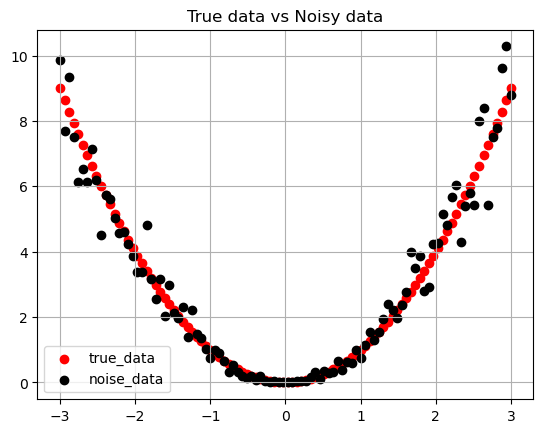

In [11]:
def create_parabolic(a, x_0, s_a, s_b):
    def calculate(x):
        noise_a = s_a * np.random.randn(x.shape[0])
        noise_b = s_b * np.random.randn(x.shape[0])
        return (a + noise_a) * (x-x_0 + noise_b)**2
    return calculate
a = 1
x_0 = 0
s_a = 0.1
s_b = 0.1

para_true = create_parabolic(a, x_0, 0, 0)
para_noise = create_parabolic(a, x_0, s_a, s_b)
x = np.linspace(-3, 3, 100)
plt.scatter(x, para_true(x), c='r', label='true_data')
plt.scatter(x, para_noise(x), c='k', label='noise_data')
plt.title('True data vs Noisy data')
plt.legend()
plt.grid()
plt.show()

In [14]:
import ipywidgets as widgets
@widgets.interact
def fit(a_pred=2, b_pred=2):
    func = create_parabolic(a_pred, b_pred, 0, 0)
    y_pred = func(x)
    y_true = para_noise(x)
    loss = np.mean((y_true-y_pred)**2)
    plt.scatter(x, y_true, alpha=0.5)
    plt.plot(x, y_pred, '-k')
    plt.title(f'Loss {loss:.2f}')
    

interactive(children=(IntSlider(value=2, description='a_pred', max=6, min=-2), IntSlider(value=2, description=…